# Interacting Ion Channels

The giant barnacle muscle fibres contain primarily voltage gated $\text{K}^+$ and $\text{Ca}^{2+}$ currents witha a $\text{K}^+$ current that is activated by intracellular $\text{Ca}^{2+}$, $\text{K}^{+}_{\text{Ca}}$. In voltage clamp experiments, neither voltage gated channel shows significant inactivation so a different mechanism was proposed. This involes a fast activating $\text{Ca}^{2+}$ current, delayed rectifier $\text{K}^+$ current and passive leak. Experimentally, the $\text{K}_{\text{Ca}}$ current was reduced using a calcium chelater EGTA. The following model describes the experimental results

\begin{align*}
    C{dV\over dt} &= -g_{Ca} m_{\infty} (V - V_{Ca}) - g_{K}w(V - V_K) - g_L (V - V_L) + I_{app} \\
    {dw\over dt} & = {\phi(w_{\infty} - w)\over \tau}
\end{align*}

where $m_{\infty}$ is the fraction of voltage dependent $\text{Ca}^{2+}$ channels and is a function of voltage and not time. $w$ is the fractionof open $\text{K}^+$ channels. $g_{Ca}$, $g_K$ and g_L are the conductances for the $\text{Ca}^{2+}$ current, $\text{K}^+$ current and leak. The equilibrium fraction of each open channel ($\text{Ca}^{2+}$ and $\text{K}^+$) and the delayed rectifier time constant ($\tau$) is described by

\begin{align*}
    m_{\infty} &= 0.5[1 + \tanh((V - v_1)/v_2)] \\
    w_{\infty} &= 0.5[1 + \tanh((V - v_3)/v_4)] \\
    \tau &= 1/\cosh((V - v_3)/(2\cdot v_4))
\end{align*}

We solve the model equations using the following parameters (Type III)

|Paremeter      | Value |
| --------      | ----- |
|$C$            | 20 $\mu\text{F}/\text{cm}^2$   |
|$V_K$          | -84 mV |
|$g_K$          | 8 $\text{mS}/\text{cm}^2$ |
|$V_{Ca}$       | 120 mV |
|$g_{Ca} $      | 4.4 $\text{mS}/\text{cm}^2$ |
|$V_{\text{leak}}$ | -60 mV |
|$g_{\text{leak}} $ | 2 $\text{mS}/\text{cm}^2$ |
|$v_1$          | -1.2 mV |
|$v_2$          | 18 mV |
|$v_3$          | 2 mV |
|$v_4$          | 30 mV |
|$\phi$         | 0.04 $/\text{ms}$ |

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from scipy import optimize
import numpy as np
import math
import sympy
from tabulate import tabulate

In [3]:
def morris_lecar(t, y, Iapp):
    V, w = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    winf = 0.5 * (1 + math.tanh((V - v3)/v4))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return [dVdt, dwdt]

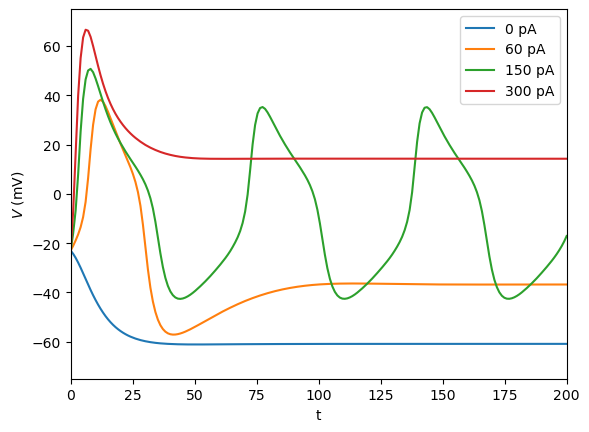

In [4]:
y0 = [-23 , 0.] #initial conditions

t = np.linspace(0, 200, 200)
test_currents = [0,60, 150, 300]
for current in test_currents:
    sol = solve_ivp(morris_lecar, [0,200], y0, args=(current,), dense_output=True)
    z = sol.sol(t)
    plt.plot(t, z.T[:,0])

plt.xlabel('t')
plt.ylabel('$V$ (mV)')
plt.xlim(0,200)
plt.ylim(-75, 75)
plt.legend([str(x) + ' pA' for x in test_currents])
plt.show()

In absence of applied current there is a stable steady-state. Increasing the curent causes transients and a new steady state. A depolarising current of 150 pA causing steady train of action potentials. For larger currents, continued spiking is lost as the giant barnacle cannot sustain continuous spiking.

## Phase Plane Analysis

Phase plane analysis ustilises a few key plot:
* Phase portraits - two variable sin the system plotted against eachother. Produces a trajectory in phase space.
* vector field - the direction a system will evolve to for any location in phase space.
* Nullclines - the values of pairs of variables at which one of the variables do not change. For the coupled system $X(x,y,t)$ and $Y(x,y,t)$, the nullclines are the solutions to $${dX\over dt} = 0, {dY\over dt} = 0$$



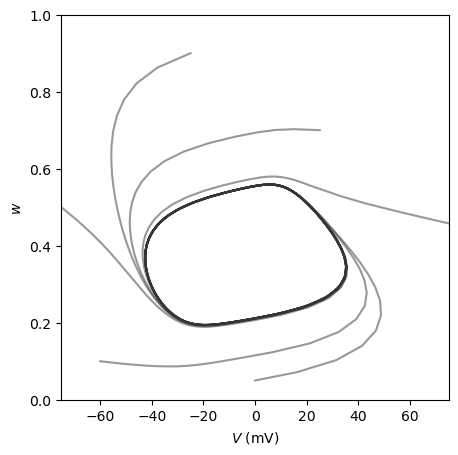

In [5]:
initail_conditions = [[-0,0.05],[-75, 0.5], [-25, 0.9], [25, 0.7], [-60,0.1], [80, 0.45]]
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
for condition in initail_conditions:
    sol = solve_ivp(morris_lecar, [0,200], condition, args=(150,), dense_output=True)
    z = sol.sol(t)
    plt.plot(z.T[:,0], z.T[:,1], color=[.2,.2,.2,.5])

plt.xlim(-75,75)
plt.ylim(0,1)
plt.xlabel('$V$ (mV)')
plt.ylabel('$w$')
plt.show()

Phase plane for the Morris-Lecar model for $I_{app} = 150\text{pA}$. The closed trajectory is a *stable limit cycle*. All trajectories converge to the stable limit cycle.

The V- and $w$-nullclines are represented as

\begin{align}
    0 &= -g_{Ca} m_{\infty} (V - V_{Ca}) - g_{K}w(V - V_K) - g_L (V - V_L) + I_{app} \\
    0 & = {\phi(w_{\infty} - w)\over \tau}
\end{align}

and plotted as such.

In [6]:
def V_nullcline(V, Iapp):
    w = sympy.symbols('w', real=True)

    cap = 20 
    VK = -84
    gK = 8 
    VCa = 120 
    gCa = 4.4
    Vl = -60 
    gl = 2 
    v1 = -1.2 
    v2 = 18 

    minf = (1 + sympy.tanh((V - v1)/v2)) / 2

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap

    return sympy.nsolve(dVdt,w, 1)

def w_nullcline(V, Iapp):
    w = sympy.symbols('w', real=True)

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = (1 + sympy.tanh((V - v1)/v2))/2
    winf = (1 + sympy.tanh((V - v3)/v4))/2
    tau = 1/sympy.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return sympy.nsolve(dwdt,w,1)

voltages = np.linspace(-75,75,101)

V_nullcline_data_I60 = [V_nullcline(volt,60) for volt in voltages]
V_nullcline_data_I150 = [V_nullcline(volt,150) for volt in voltages]
V_nullcline_data_I300 = [V_nullcline(volt,300) for volt in voltages]

w_nullcline_data = [w_nullcline(volt,0) for volt in voltages]

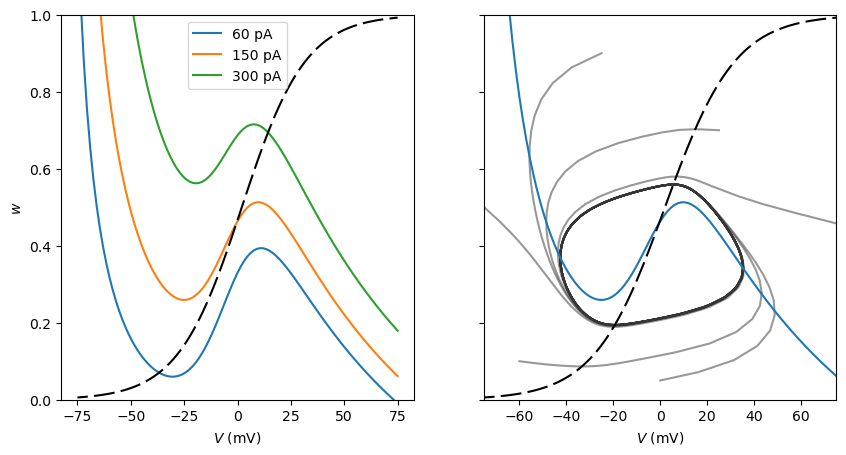

In [7]:
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(10,5)
initail_conditions = [[-0,0.05],[-75, 0.5], [-25, 0.9], [25, 0.7], [-60,0.1], [80, 0.45]]
for condition in initail_conditions:
    sol = solve_ivp(morris_lecar, [0,200], condition, args=(150,), dense_output=True)
    z = sol.sol(t)
    ax[1].plot(z.T[:,0], z.T[:,1], color=[.2,.2,.2,.5])

plt.xlim(-75,75)
plt.ylim(0,1)
ax[0].set_ylabel("$w$")
ax[0].set_xlabel('$V$ (mV)')
ax[1].set_xlabel('$V$ (mV)')

ax[0].plot(voltages, V_nullcline_data_I60)
ax[0].plot(voltages, V_nullcline_data_I150)
ax[1].plot(voltages, V_nullcline_data_I150)
ax[0].plot(voltages, V_nullcline_data_I300)

ax[0].plot(voltages, w_nullcline_data, 'black', linestyle=(5, (10, 3)))
ax[1].plot(voltages, w_nullcline_data, 'black', linestyle=(5, (10, 3)))

plt.xlim(-75,75)
plt.ylim(0,1)

ax[0].legend(['60 pA', '150 pA', '300 pA'])
plt.show()

Nullclines for the Morris-Lecar model at 60, 150 and 300 pA. The $w$-nullcline does not change with varying $I_{app}$. The intersection points at 60 and 300 pA are stable **fixed points** and represent the steady state values that the system evolves to. The intersection point at 150 pA is an unstable fxed point. The system rather oscillates around this intersection point instead of evolving to a steady state.

## Stability Analysis

Fixed points are either stable of unstable. Trajectories move towards stable fixed points while trajectories move away from unstable fixed points. The eigenvalues of the Jacobian matrix determine the stability of a system. Negative real eigenvalues indicate a stable solution, positive real eigenvalues indicate an unstable solution, complex eigenvalues indicate the presence of oscillations in the solution.

We first calculate the fixed points of the system at $I_{app}$ and then investigate the stability at that point.

In [133]:
def morris_lecar_roots(Iapp):

    def morris_lecar_eqs(y, Iapp):
        V, w = y

        cap = 20
        VK = -84
        gK = 8
        VCa = 120
        gCa = 4.4
        Vl = -60
        gl = 2
        v1 = -1.2
        v2 = 18
        v3 = 2
        v4 = 30
        phi = 0.04

        minf = 0.5 * (1 + math.tanh((V - v1)/v2))
        winf = 0.5 * (1 + math.tanh((V - v3)/v4))
        tau = 1/math.cosh((V - v3)/(2*v4))

        ca_cur = -gCa * minf * (V - VCa)
        k_cur = -gK * w * (V - VK)
        leak = -gl * (V - Vl)
        
        dVdt = (ca_cur + k_cur + leak + Iapp)/cap
        dwdt = phi *(winf - w)/tau

        return [dVdt, dwdt]

    roots = optimize.root(morris_lecar_eqs, [0,0.5], args=(Iapp,))
    #print(roots)
    return roots.x

roots = []
Iapp_list = [0,60,110,150,180,300]
for i in range(len(Iapp_list)):
    root = morris_lecar_roots(Iapp_list[i])
    roots.append([Iapp_list[i], root[0], root[1]])

print(tabulate(roots, headers=['$I_app$',"$V$","$w$"], tablefmt="github"))

|   $I_app$ |        $V$ |       $w$ |
|-----------|------------|-----------|
|         0 | -60.8554   | 0.014915  |
|        60 | -36.7547   | 0.0701982 |
|       110 | -19.2193   | 0.195506  |
|       150 |  -0.459844 | 0.459094  |
|       180 |   4.44417  | 0.540646  |
|       300 |  14.3021   | 0.694266  |


In [103]:
#returns the jacobian matrix for the Moris-Lecar model. Iapp is actually unnecessary and has no affect on the result as Iapp is a constant.
def morris_lecar_jacobian():
    V, w = sympy.symbols('V w')
    Iapp = 0
    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + sympy.tanh((V - v1)/v2))
    winf = 0.5 * (1 + sympy.tanh((V - v3)/v4))
    tau = 1/sympy.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return sympy.Matrix([dVdt, dwdt]).jacobian(sympy.Matrix([V, w]))


def morris_lecar_eig(V0, w0):
    V, w = sympy.symbols('V w')
    jac = sympy.Matrix(morris_lecar_jacobian())
    f = sympy.lambdify([V, w], jac)
    return sympy.Matrix(f(V0, w0)).eigenvals()

eig = []
for i in range(len(roots)):
    eigs = list(morris_lecar_eig(roots[i][0], roots[i][1]).keys())
    eig.append([roots[i][0],roots[i][1], roots[i][2], eigs[0], eigs[1]])

print(tabulate(eig, headers=["$I_app$","$V$","$w$","Eigenvalue","Eigenvalue"], tablefmt="github"))

|   $I_app$ |     $V$ |   $w$ | Eigenvalue                           | Eigenvalue                           |
|-----------|---------|-------|--------------------------------------|--------------------------------------|
|         0 | -60.855 | 0.015 | 24.8557044418457                     | -0.0409654476676187                  |
|        60 | -60.399 | 0.015 | 23.7298819715700                     | 0.0514023963908549                   |
|       110 | -59.945 | 0.016 | 23.2613174883012                     | 0.272385584421939                    |
|       150 | -59.492 | 0.016 | 22.5060239992912                     | 0.733416543116215                    |
|       180 | -59.041 | 0.017 | 21.4187093912211                     | 1.48812002041742                     |
|       300 | -58.592 | 0.017 | 10.1228543666211 - 16.404745898967*I | 10.1228543666211 + 16.404745898967*I |


While the change in $I_app$ has no affect on the value of the eigenvalues, a change in $I_app$ causes a change in the location of the fixed points.

## Why Oscillations Occur

In [10]:
def morris_lecar_fast_current_total(y, Iapp, w):
    V = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    total_current = -(ca_cur + k_cur + leak + Iapp)

    return total_current

def morris_lecar_fast_currents(y, Iapp, w):
    V = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    total_current = -(ca_cur + k_cur + leak + Iapp)

    return [total_current, -k_cur, -ca_cur]

def morris_lecar_vec_1D(y, Iapp, w):
    V = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap

    return dVdt



C:\Users\User\AppData\Local\Temp\ipykernel_26352\3876868915.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minf = 0.5 * (1 + math.tanh((V - v1)/v2))
C:\Users\User\AppData\Local\Temp\ipykernel_26352\3876868915.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tau = 1/math.cosh((V - v3)/(2*v4))


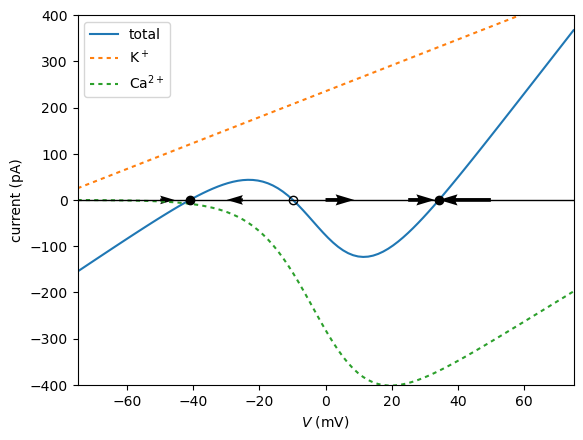

In [100]:
#calculate and plot the currents
v = np.linspace(-75,75,100)
tot_current = []
k_current = []
ca_current = []
for volt in v:
    dat = morris_lecar_fast_currents(volt, 150, 0.35)
    tot_current.append(dat[0])
    k_current.append(dat[1])
    ca_current.append(dat[2])

plt.plot(v,tot_current)
plt.plot(v,k_current, linestyle=(0,(2,2)))
plt.plot(v,ca_current, linestyle=(0,(2,2)))

#caluculate and plot the fixed points (roots). Eigenvalues determine open or closed  marker, based on stability.
roots = []
for volt in v:
    r = optimize.root(morris_lecar_fast_current_total, volt, args=(150, 0.35))
    roots.append(round(r.x[0],3))
roots = np.unique(roots)

for i in range(len(roots)):
    reals = [sympy.re(x) for x in list(morris_lecar_eig(roots[i],0.35).keys())]
    if (reals[0] > 0):
        plt.plot(roots[i],[0],'o', color=[0,0,0], mfc='none')
    if (reals[0] < 0):
        plt.plot(roots[i],[0],'o', color=[0,0,0])

#Calculate and plot trajectories around the fixed points
v_vec = np.linspace(-50,50,5)
vec = []
for volt in v_vec:
    vec.append(morris_lecar_vec_1D(volt, 150, 0.35))

plt.quiver(v_vec, 0, vec, 0)

plt.xlim(-75,75)
plt.ylim(-400,400)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('$V$ (mV)')
plt.ylabel('current (pA)')
plt.legend(['total','K${}^+$', 'Ca${}^{2+}$'])
plt.show()

In [ ]:
#Extra
#alternate method to nullclines

def V_nullcline(V, Iapp):
    w = sympy.symbols('w', real=True)

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + sympy.tanh((V - v1)/v2))
    winf = 0.5 * (1 + sympy.tanh((V - v3)/v4))
    tau = 1/sympy.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return [sympy.solve(dVdt,w),sympy.solve(dwdt,w)]



In [ ]:
potentials = np.linspace(-75,75,100)
V_null = []
w_null = []
for v in potentials:
    res = V_nullcline(v, 150)
    V_null.append(res[0][0])
    w_null.append(res[1][0])

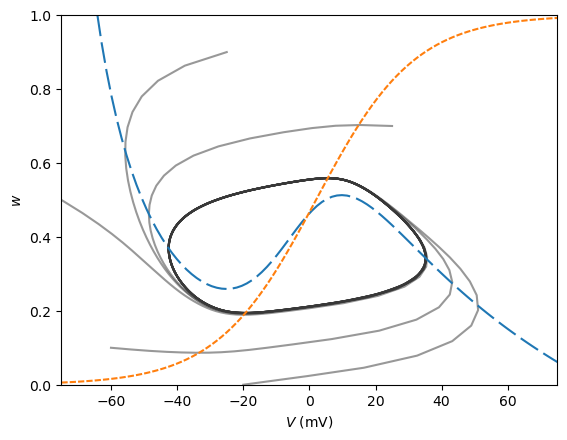

In [ ]:
initail_conditions = [[-20,0],[-75, 0.5], [-25, 0.9], [25, 0.7], [-60,0.1]]
for condition in initail_conditions:
    sol = solve_ivp(morris_lecar, [0,200], condition, args=(150,), dense_output=True)
    z = sol.sol(t)
    plt.plot(z.T[:,0], z.T[:,1], color=[.2,.2,.2,.5])

plt.plot(potentials,V_null, linestyle=(5, (10, 3)))
plt.plot(potentials,w_null, linestyle=(0, (3, 1)))
plt.xlim(-75,75)
plt.ylim(0,1)
plt.xlabel('$V$ (mV)')
plt.ylabel('$w$')
plt.show()